In [36]:
import pandas as pd
import matplotlib.pyplot as pt
data = pd.read_csv("data.csv", low_memory = False)
# data.columns
data['DATE'] = pd.to_datetime(data['EVENT_DATE'])
def to_year(date): return date.year
data['YEAR'] = data['DATE'].apply(to_year)
print('done')

done


In [41]:
a1f = data[['ACTOR1', 'FATALITIES', 'YEAR']].rename(index=str, columns={"ACTOR1": "ACTOR"})
a2f = data[['ACTOR2', 'FATALITIES', 'YEAR']].rename(index=str, columns={"ACTOR2": "ACTOR"})
all_actors = pd.DataFrame(a1f.append(a2f))
print('done')

done


## Top 10 conflicts by actor

In [42]:
top10conflicts = pd.DataFrame(all_actors.groupby(all_actors['ACTOR']).size().reset_index(name="Counts").sort_values(by='Counts', ascending = False)[0:10])

top10actors_conflict = []
for actor in top10conflicts['ACTOR']:
    top10actors_conflict.append(actor)

top0 = all_actors[all_actors['ACTOR'] == top10actors_conflict[0]]

# for i in range(1,10):
#     top10overTime = top10overTime.append(all_actors[all_actors['ACTOR'] == top10actors_conflict[i]])

print('done')

done


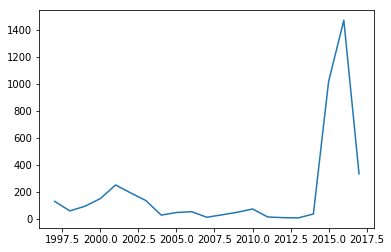

In [60]:
top0sorted = top0.groupby(top0['YEAR']).size().reset_index(name="Counts").sort_values(by='YEAR', ascending = False)

for i in range(10):
    # plot these all of them
    pt.plot(top0sorted['YEAR'], top0sorted['Counts'])

## Top 10 fatality counts by Actor

In [ ]:
top10f = pd.DataFrame(all_actors.groupby(['ACTOR'])['FATALITIES'].sum()).sort_values(by = 'FATALITIES', ascending = False)[0:10]
top10f['FATALITIES']

In [ ]:
top10f.plot(kind = 'barh')